# Interpreting Regression Beta Coefs

In [264]:
import pandas as pd
import matplotlib.pyplot as plt # For Residual Plots! 
import statsmodels.api as sm
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
import numpy as np


# For Train Test Split 
from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.datasets import california_housing

In [216]:
# Load in Data 

df = pd.read_csv("kc_house_data.csv")

# Break off Target Variable
target = df['price']

# Train Test Split 

Before we start messing with our data, we need to break a bit off and not look at it until we are ready to test ourselves. This will be our `df_test` and `target_test`. This is 20% of our data that we just want to never even THINK about until we are ready to be done. 

This gives us the luxery to be able to play around with whateve combinations of features I want until I am satisfied with lining up what I think about the world with what the maths tell me. 


In [217]:
# Split that data 

df, df_test, target, target_test = train_test_split(df,target, test_size=.2, random_state= 42)

# DON'T TOUCH TAREGET TEST OR DF TEST UNTIL YOU ARE READY TO SHOOT! 

In [218]:
print("My training set's shape is:", df.shape)
print("My target variales shape is:", target.shape)
print("My training set's shape is:", df_test.shape)
print("My training set's shape is:", target_test.shape)

My training set's shape is: (17277, 21)
My target variales shape is: (17277,)
My training set's shape is: (4320, 21)
My training set's shape is: (4320,)


### Take One: WTF is going on with this data?

I don't know much about this data, but I am going to try to just model it based on two things that I think might be helpful. This might be good, this might be bad. I am going to look at number of bedrooms and squarefoot living. I am picking this just because I know that as we get more stuff in a house, the variables go up.

If I didn't want to use my brain, I could instead use a correlation matrix to try to pick variables with that.
There's nothing intrinscially wrong with this, but you need to think critically about all of this because it's not just about the numbers!!

In [219]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.017355,0.004771,0.010316,-0.006055,-0.134586,0.025876,-0.012190,0.008700,-0.019836,0.010580,-0.001595,0.025294,-0.012564,-0.012620,-0.005435,0.024282,0.001154,-0.140215
price,-0.017355,1.000000,0.315422,0.529378,0.701778,0.089524,0.258561,0.275385,0.400145,0.042909,0.670040,0.603072,0.047772,0.129166,-0.048010,0.305863,0.017225,0.588622,0.078741
bedrooms,0.004771,0.315422,1.000000,0.527008,0.592701,0.041579,0.183144,0.002254,0.088486,0.017482,0.362265,0.492467,0.157525,0.020966,-0.151134,-0.015483,0.131968,0.404960,0.034729
bathrooms,0.010316,0.529378,0.527008,1.000000,0.758467,0.090724,0.500929,0.071959,0.192903,-0.126765,0.664047,0.687644,0.500170,0.057154,-0.198293,0.030936,0.217301,0.571871,0.086461
sqft_living,-0.006055,0.701778,0.592701,0.758467,1.000000,0.182080,0.353172,0.111976,0.288661,-0.056987,0.761207,0.875670,0.313638,0.054631,-0.195949,0.053362,0.236566,0.759525,0.187308
sqft_lot,-0.134586,0.089524,0.041579,0.090724,0.182080,1.000000,-0.003873,0.023484,0.077069,-0.009913,0.120223,0.190362,0.057244,0.006166,-0.132420,-0.081812,0.233827,0.153907,0.709840
floors,0.025876,0.258561,0.183144,0.500929,0.353172,-0.003873,1.000000,0.024805,0.033378,-0.261006,0.458976,0.525346,0.487007,0.003389,-0.058511,0.052957,0.123830,0.280191,-0.011994
waterfront,-0.012190,0.275385,0.002254,0.071959,0.111976,0.023484,0.024805,1.000000,0.409383,0.024644,0.090274,0.076729,-0.025740,0.086732,0.028418,-0.012360,-0.032924,0.094300,0.031537
view,0.008700,0.400145,0.088486,0.192903,0.288661,0.077069,0.033378,0.409383,1.000000,0.045465,0.258279,0.173194,-0.050347,0.095173,0.085784,0.009798,-0.075741,0.283068,0.074281
condition,-0.019836,0.042909,0.017482,-0.126765,-0.056987,-0.009913,-0.261006,0.024644,0.045465,1.000000,-0.144610,-0.156815,-0.365650,-0.061515,0.009895,-0.018195,-0.112165,-0.089221,-0.003178


In [220]:
df[['price','sqft_living','bedrooms']].corr()

,price,sqft_living,bedrooms
price,1.000000,0.701778,0.315422
sqft_living,0.701778,1.000000,0.592701
bedrooms,0.315422,0.592701,1.000000


Appear to be decent correlations here! Maybe this can be my *baseline model*???

Text(0.5, 1.0, 'Number of Bedrooms')

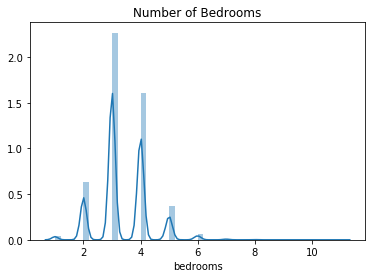

In [221]:
# Little EDA
sns.distplot(df['bedrooms']).set_title("Number of Bedrooms")

Text(0.5, 1.0, 'Square Foot Living')

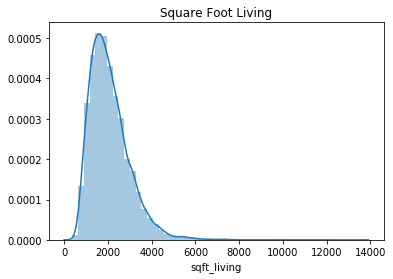

In [222]:
sns.distplot(df['sqft_living']).set_title("Square Foot Living")

Text(0.5, 1.0, 'What I am Trying to Predict: PRICE!')

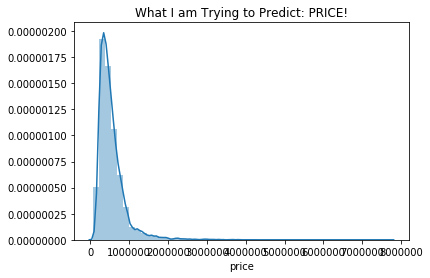

In [223]:
sns.distplot(df['price']).set_title("What I am Trying to Predict: PRICE!")

Ehh, seems like some SERIOUS outliers here. Like the middle bit is normally distributed, but there are so many super expensive houses.

Here I think to myself.... is it correct to assume that one big phat regression model is going to be suitble for every single house in King County? Do I really think all these variables will affect price the same degree for cheap houses as multi million dollar houses? I'll try it for now, but that doesn't feel right...

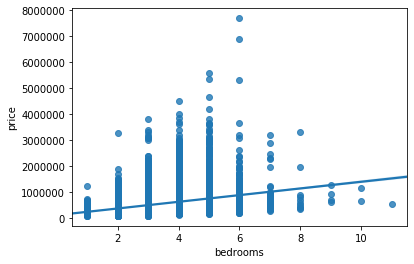

In [224]:
sns.regplot(df['bedrooms'], df['price'])

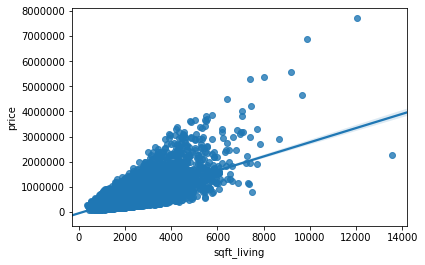

In [225]:
sns.regplot(df['sqft_living'], df['price'])

Already can tell I am setting myself up for failing homoscedasticity... but gotta start somewhere!!

Let's just pick two variables because we think they could be helpful. Who knows if they are good! 

## Standardised vs Unstandardised Coefs 

In [226]:
# Get Variables as they are for UNSTANDARDISED Coefs
df_small = df[["bedrooms","sqft_living"]]

# Take Two Variabls and Z score them! 
df_small['z_bedrooms'] = stats.zscore(df_small['bedrooms'])
df_small['z_sqft_living'] = stats.zscore(df_small['sqft_living'])

# Break them up into two sep dfs
df_unstandardised = df_small[['bedrooms',"sqft_living"]]
df_standardised = df_small[['z_bedrooms',"z_sqft_living"]]

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [227]:
print("The average bedrooms is: ", df_unstandardised['bedrooms'].mean())
print("The average sqft living is: ", df_unstandardised['sqft_living'].mean())

The average bedrooms is:  3.3748914742142735
The average sqft living is:  2083.498292527638


In [228]:
print("The average bedrooms as a z score is: ", round(df_standardised['z_bedrooms'].mean()))
print("The average sqft living as a z score is : ", round(df_standardised['z_sqft_living'].mean()))

The average bedrooms as a z score is:  0
The average sqft living as a z score is :  0


In [229]:
df_unstandardised.head()

,bedrooms,sqft_living
6243,4,1440
8986,3,1430
9419,4,3120
10155,4,2060
10436,3,2500


In [230]:
df_standardised.head()

,z_bedrooms,z_sqft_living
6243,0.691203,-0.701342
8986,-0.414530,-0.712241
9419,0.691203,1.129672
10155,0.691203,-0.025611
10436,-0.414530,0.453941


In [231]:
df_unstandardised.head()

print(target.shape, df_unstandardised.shape)

(17277,) (17277, 2)


In [232]:
X_unstandardised = sm.add_constant(df_unstandardised)
model_unstandardised = sm.OLS(target,X_unstandardised)
results_unstandardised = model_unstandardised.fit()

results_unstandardised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     8920.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:31:00   Log-Likelihood:            -2.3985e+05
No. Observations:               17277   AIC:                         4.797e+05
Df Residuals:                   17274   BIC:                         4.797e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.996e+04   7608.152     11.824      0.000     7.5e+04    1.05e+05
bedrooms    -6.322e+04   2703.079    -23.388      0.000   -6.85e+04   -5.79e+04
sqft_living   319.1343      2.664    119.780      0.000     313.912     324.357
==============================================================================
Omnibus:                    11133.027   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333103.545
Skew:                           2.635   Prob(JB):                         0.00
Kurtosis:                      23.856   Cond. No.                     9.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [233]:
results_unstandardised.params

const          89959.004821
bedrooms      -63218.537308
sqft_living      319.134270
dtype: float64

In our **unstandardised** the coefs are:

$price = -63,218 * \beta_{bedrooms} + 319 * \beta_{sqftliving} + 89,959$

This can be interpreted as for every bedroom that is added, you can expect price to DROP by -$57,832, all other factors (square foot living) held equal.

> Notice here that the bedroom coeffecient is much bigger in magnitude (not just direction) than the squarefoot living. This does not mean that Bedrooms has more of an effect on PRICE than SQUARE FOOT living

We could divide the two coefs to TRY to compare them BUT THAT WOULDN'T MAKE ANY SENSE BECAUSE THEY ARE MEASURED ON THE SAME SCALE!! SEE THE NEXT CELL WHERE I DO THAT WHICH IS VERY DUMB TO DO!

Welcome to the **DANGER ZONE**!

This means that as bedrooms goes UP our price goes down!
Multi collinearity run amok!

For comparison, let's try it with our standardised...

In [247]:
results_unstandardised.params[2]/results_unstandardised.params[1]

-0.005048112212881101

In [248]:
X_standardised = sm.add_constant(df_standardised)
model_standardised = sm.OLS(target,X_standardised)
results_standardised = model_standardised.fit()

results_standardised.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     8920.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:31:59   Log-Likelihood:            -2.3985e+05
No. Observations:               17277   AIC:                         4.797e+05
Df Residuals:                   17274   BIC:                         4.797e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.415e+05   1968.939    275.031      0.000    5.38e+05    5.45e+05
z_bedrooms    -5.717e+04   2444.603    -23.388      0.000    -6.2e+04   -5.24e+04
z_sqft_living  2.928e+05   2444.603    119.780      0.000    2.88e+05    2.98e+05
==============================================================================
Omnibus:                    11133.027   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333103.545
Skew:                           2.635   Prob(JB):                         0.00
Kurtosis:                      23.856   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
results_standardised.params

const            541519.009435
z_bedrooms       -57173.408016
z_sqft_living    292813.499870
dtype: float64

In our **standardised** the coefs are:

$price = -57,173 * \beta_{bedrooms} + 292,813 * \beta_{sqftliving} + 541,519$

This can be interpreted as for every increase of one standard deviation (or one z) that is added, you can expect price to DROP by -$54,715, all other factors (square foot living) held equal.

> Notice here that the bedroom coeffecient (-54,715) is much SMALLER in magnitude (not just direction) than the squarefoot living (279,983). Since both IVs are on the same scale, we can say that square foot living has a much lager impact on price than number of bedrooms. In fact as seen from below, it's ~5x greater!!






In [250]:
results_standardised.params[2]/results_standardised.params[1]

-5.121498088540314

Lastly, let's see what happens when we *standardise everything*.

In [251]:
z_target = stats.zscore(target)

X_standardised_all = sm.add_constant(df_standardised)
model_standardised_all = sm.OLS(z_target,X_standardised)
results_standardised_all = model_standardised_all.fit()

results_standardised_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     8920.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:32:09   Log-Likelihood:                -18387.
No. Observations:               17277   AIC:                         3.678e+04
Df Residuals:                   17274   BIC:                         3.680e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.98e-17      0.005    1.5e-14      1.000      -0.010       0.010
z_bedrooms       -0.1550      0.007    -23.388      0.000      -0.168      -0.142
z_sqft_living     0.7936      0.007    119.780      0.000       0.781       0.807
==============================================================================
Omnibus:                    11133.027   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333103.545
Skew:                           2.635   Prob(JB):                         0.00
Kurtosis:                      23.856   Cond. No.                         1.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
round(results_standardised_all.params[0])

0.0

What do we see here?

Now our model says...

$price = -0.1550 * \beta_{bedrooms} + 0.7936 * \beta_{sqftliving} + 0$

Now EVERYTHING is on a z score and we can do apples to apples comparisons.

This can be interpreted as for every increase of one standard deviation (or one z) that is added to bedrooms, you can expect price to DROP by -$0.1542 standard deviations, all other factors (square foot living) held equal.

> Notice here that the bedroom coeffecient (-0.1542) is much SMALLER in magnitude (not just direction) than the squarefoot living (.7892). Notice that the magnitude of this relationship is the **exact same** as above!!




In [253]:
results_standardised_all.params[2]/results_standardised_all.params[1]

-5.121498088540311

## Did I do good model?

Just because you ran a model doesn't mean it's good! 

How can you check it?

**We already know that we have some weird supression effects in the model, but let's see what happens when we plot all of this**

There are a lot of tools to do this with [statsmodels that you can find in the documentation](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html).


### Independence Assumption

There is no way to check this with Python, you need to know your data and where it comes from!

That said, if there is some sort of indpendence violation, you can always check for autocorrelation, but we will talk about that more in Mod 3 and Mod 4.



### Homoskedasticity 


### Normality of Residuals

How do we check if our residuals are normally distributed?

All the residuals live in the `.resid` attribute!


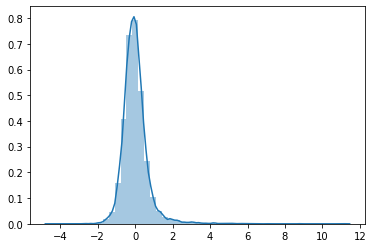

In [254]:
sns.distplot(results_standardised_all.resid)

When we plot them, it looks pretty normal, but we have TONS of data that is far beyond the typical threshold of 4 z scores!! Why do you think this is the case?

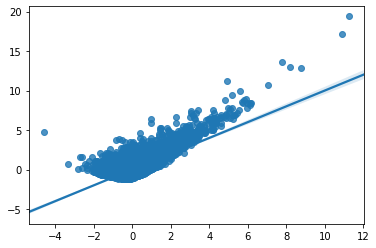

In [255]:
results_standardised_all.df_resid

# Poor Man's Diagnostic Plot 
sns.regplot(results_standardised_all.resid, z_target)

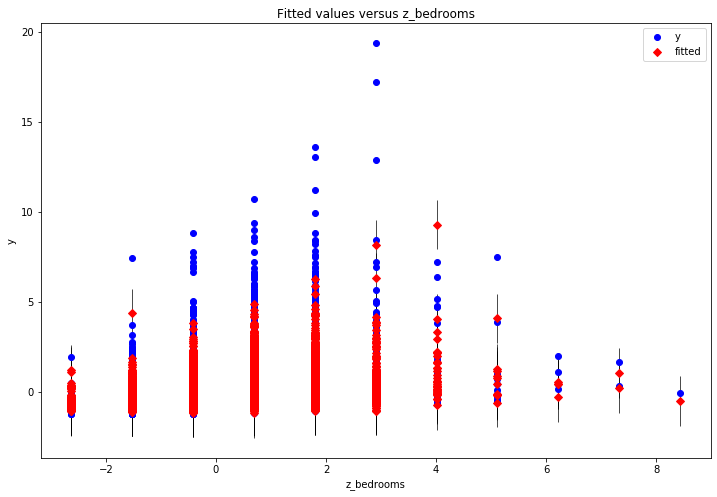

In [256]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results_standardised_all, "z_bedrooms", ax=ax)

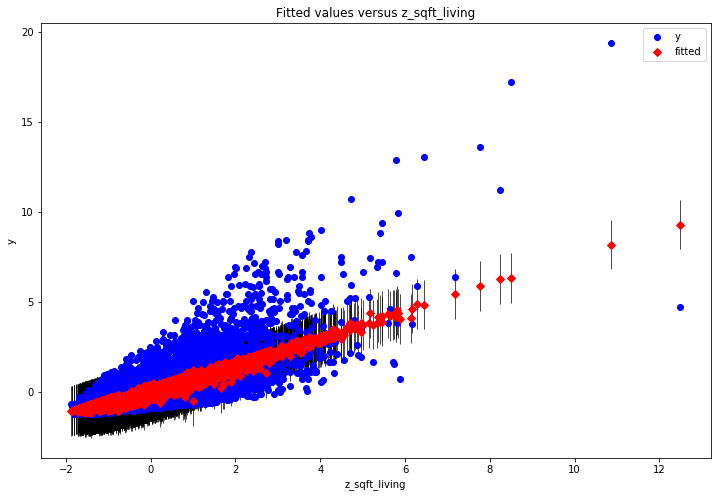

In [257]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results_standardised_all, "z_sqft_living", ax=ax)

> Back to the drawing board! **Not good enough to test yet!!!!**

## Take 2.... take N !

We have now ran our first regression model and learned a few things:

* We can get a decent R2 (.52)
* We have some nasty supression effects happening that is not aligning with our intuition that as number of rooms goes up, so should price! 
* Appears that there is TONS of variablility when we get to the super expensive houses, maybe it's **NOT** a good idea to fit ONE BIG regression model for ALL OF KING COUNTY!!! 
* Let's pick some *new* features
* Now I have been thinking about all this, what can I do with the data now that I didn't know before... Do another iteration of the model... 


In [268]:
# I write a ton more code here with more and more models with my training set 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms,square_root_living
6243,9834201100,12/22/2014,332500.0,4,2.00,1440,4855,2.0,0.0,0.0,...,0.0,1972,0.0,98144,47.5717,-122.287,1300,4080,6.00,37.947332
8986,7795810110,5/12/2015,390000.0,3,1.75,1430,9857,1.0,0.0,2.0,...,290.0,1980,0.0,98045,47.4964,-121.771,1310,9880,4.75,37.815341
9419,1853081250,12/29/2014,800000.0,4,2.75,3120,5000,2.0,0.0,0.0,...,0.0,2010,0.0,98074,47.5940,-122.062,3200,5000,6.75,55.856960
10155,2558630350,3/21/2015,462000.0,4,2.50,2060,6958,1.0,0.0,0.0,...,840.0,1974,NaN,98034,47.7251,-122.168,1760,7350,6.50,45.387223
10436,3362401000,7/1/2014,695000.0,3,2.00,2500,4080,1.5,0.0,0.0,...,820.0,1922,0.0,98103,47.6813,-122.346,1550,3060,5.00,50.000000


In [308]:
# Only want to model regular houses with year built as feature engineer 


# Combine Rooms as one variable ??
df["rooms"] = df["bedrooms"] + df["bathrooms"]

# undo that square thing 
df["square_root_living"] = np.sqrt(df["sqft_living"])


temp_build = df.groupby('yr_built').mean()
temp_build_2 = temp_build['price']

temp_build_3 = pd.DataFrame(temp_build_2)
temp_build_3['year'] = temp_build_3.index

# Time Since 1960 Variable 

df["time_since_1960"] = abs(df["yr_built"] - 1960)

final_features = df[["time_since_1960", "square_root_living"]]

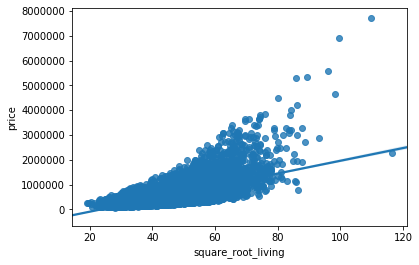

In [309]:
sns.regplot(df['square_root_living'], df['price'])

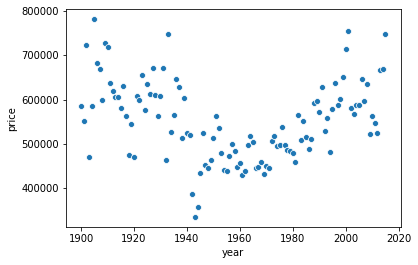

In [310]:
sns.scatterplot(temp_build_3['year'], temp_build_3['price'])

In [311]:
X_final = sm.add_constant(final_features)
model_final = sm.OLS(target,X_final)
results_final = model_final.fit()

results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     6775.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:57:38   Log-Likelihood:            -2.4098e+05
No. Observations:               17277   AIC:                         4.820e+05
Df Residuals:                   17274   BIC:                         4.820e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6.132e+05   1.02e+04    -60.304      0.000   -6.33e+05   -5.93e+05
time_since_1960      958.2470    127.612      7.509      0.000     708.115    1208.379
square_root_living   2.53e+04    225.098    112.389      0.000    2.49e+04    2.57e+04
==============================================================================
Omnibus:                    13851.926   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           805098.615
Skew:                           3.422   Prob(JB):                         0.00
Kurtosis:                      35.735   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The BIG TEST! 

Ok, maybe after doing tons of models, I finally am happy with one! 

At this point in time, I am committing myself to whatever the output is, that's what goes in the final slide deck.
Let's test it out! 

What I need to do here is LITERALLY COPY AND PASTE everything that you did with the model (including data cleaning choies!!!) you like the most, then swap out your `df` and `target` variables for `df_target` and `df_test` from above. 

You press RUN and then brace yourself to see how you did! (and probably have a bit of drop in R2...)


In [313]:
# undo that square thing 
df_test["square_root_living"] = np.sqrt(df_test["sqft_living"])

# Time Since 1960 Variable 

df_test["time_since_1960"] = abs(df_test["yr_built"] - 1960)

final_features_test = df_test[["time_since_1960", "square_root_living"]]



Then at the end of the notebook, I'd explain what I did! 

In [315]:
X_final_test = sm.add_constant(final_features_test)
model_final_test = sm.OLS(target_test,X_final_test)
results_final_test = model_final_test.fit()

results_final_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     1684.
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        14:59:40   Log-Likelihood:                -60164.
No. Observations:                4320   AIC:                         1.203e+05
Df Residuals:                    4317   BIC:                         1.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -5.803e+05   1.97e+04    -29.385      0.000   -6.19e+05   -5.42e+05
time_since_1960      679.1299    252.192      2.693      0.007     184.705    1173.555
square_root_living  2.469e+04    439.342     56.197      0.000    2.38e+04    2.56e+04
==============================================================================
Omnibus:                     3969.467   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416871.252
Skew:                           3.999   Prob(JB):                         0.00
Kurtosis:                      50.455   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""